<a href="https://colab.research.google.com/github/Reichidad/Machine-Learning-2020-Spring-Class/blob/assignment05/assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05. Logistic regression for a binary classification - 20145822 김영현
---
## 1. Plot the training data

## 2. Plot the estimated parameters

## 3.  Plot the training error

## 4. Plot the obtained classifier

100000 -4.807052094568174 -4.8070855374835455
200000 -7.447168994306261 -7.447190186146328
300000 -9.25352666503654 -9.253542194874772
400000 -10.631023975122027 -10.631036252740337
500000 -11.74604913162208 -11.746059288326572
600000 -12.682802466575305 -12.68281112335177
700000 -13.489903836305531 -13.489911371539266
800000 -14.19807136335372 -14.198078025366339
900000 -14.828017912294449 -14.828023873313686
1000000 -15.3944138893229 -15.394419274010577
1100000 -15.908056935631008 -15.908061837332827
1200000 -16.377142963120697 -16.37714745368662
1300000 -16.80805207519539 -16.808056211206463
1400000 -17.205856469009504 -17.205860295886158
1500000 -17.574660965434923 -17.574664520239722
1600000 -17.917838535464988 -17.917841848869934
1700000 -18.238197600554734 -18.238200698256584
1800000 -18.53810364516581 -18.538106548926287
1900000 -18.819569420770996 -18.819572149195878
2000000 -19.084323054613 -19.08432562374541
2100000 -19.33386029487418 -19.333862718653194
2200000 -19.56948515

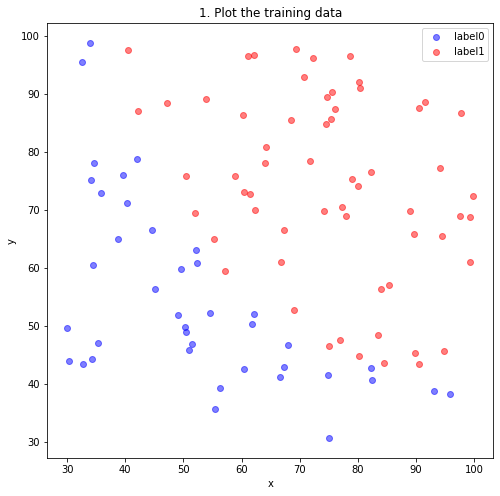

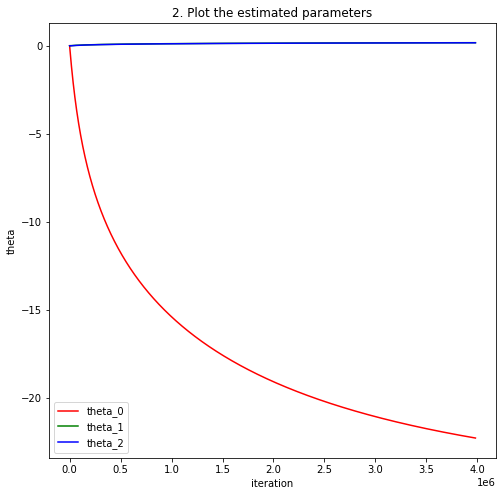

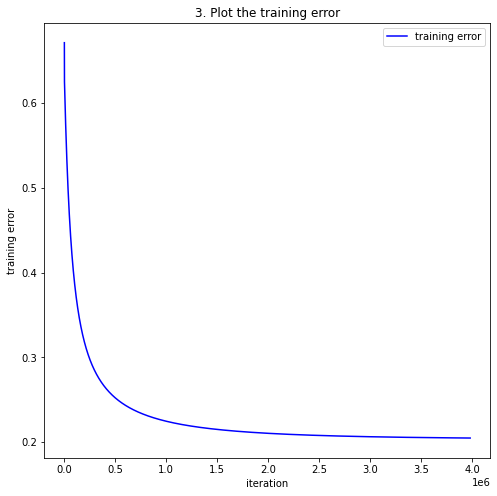

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

# data input
data = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/data05/data.txt", delimiter=',')

x = data[:, 0]
y = data[:, 1]
label = data[:, 2]

x_label0 = x[label == 0]
x_label1 = x[label == 1]

y_label0 = y[label == 0]
y_label1 = y[label == 1]

# function definition
# calculate z value
def calc_z(theta_0, theta_1, theta_2, x, y):
  z= []
  for i in range(len(x)):
    z.append(theta_0 + (theta_1 * x[i]) + (theta_2 * y[i]))
  return z
# calculate sigmoid value
def calc_sigmoid(z):
  sigmoid = []
  for i in range(len(z)):
    sigmoid.append(1/(1+math.exp(-z[i])))
  return sigmoid
# calculate objective function value
def ob_func(label, sigmoid):
  sum = 0
  for i in range(len(label)):
    oprd_left = (-1*label[i]) * math.log(sigmoid[i])
    oprd_right = (1-label[i]) * math.log(1-sigmoid[i])
    sum += oprd_left - oprd_right
  return sum/len(label)
# calculate next theta value
def theta_desc(theta, alpha, x, y, label, sigmoid, key):
  sum = 0
  for i in range(len(sigmoid)):
    if key == 0:
      sum += sigmoid[i] - label[i]
    elif key == 1:
      sum += (sigmoid[i] - label[i]) * x[i]
    elif key == 2:
      sum += (sigmoid[i] - label[i]) * y[i]
  return theta - (alpha * sum / len(sigmoid))

# variable initialization
theta_0 = 0.01
theta_1 = 0.01
theta_2 = 0.01
alpha = 0.001
iteration = 0
# variable list for store iteration data
ob_func_list = []
theta_0_list = []
theta_1_list = []
theta_2_list = []
# iteration
while True:
  # calculate each value for this iteration
  z_list = calc_z(theta_0, theta_1, theta_2, x, y)
  sigmoid_list = calc_sigmoid(z_list)
  ob_func_val = ob_func(label, sigmoid_list)
  # store each value
  theta_0_list.append(theta_0)
  theta_1_list.append(theta_1)
  theta_2_list.append(theta_2)
  ob_func_list.append(ob_func_val)

  # escape rule
  if iteration > 0:
    if iteration % 100000 == 0:
      print(iteration, theta_0_list[iteration-1], theta_0)
    if abs(theta_0_list[iteration-1] - theta_0)< 0.000001:
      print(iteration, theta_0_list[iteration-1], theta_0))
      break
  # update next theta values & iteration value
  theta_0 = theta_desc(theta_0, alpha, x, y, label, sigmoid_list, 0)
  theta_1 = theta_desc(theta_1, alpha, x, y, label, sigmoid_list, 1)
  theta_2 = theta_desc(theta_2, alpha, x, y, label, sigmoid_list, 2)
  iteration += 1

iterations = []
for i in range(iteration+1):
  iterations.append(i)

# 1. Plot the training data
# plot the training data points (x,y) with their labels
# blue for label 0 and red for label 1
plt.figure(1,figsize=(8, 8))
plt.title('1. Plot the training data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_label0, y_label0, alpha=0.5, c='b', label='label0')
plt.scatter(x_label1, y_label1, alpha=0.5, c='r', label='label1')
plt.legend()

# 2. Plot the estimated parameters
# plot the thetas at every iteration of gradient descent until convergence
# (θ0,θ1,θ2) should be red, green, blue, respectively
plt.figure(2,figsize=(8, 8))
plt.title('2. Plot the estimated parameters')
plt.xlabel('iteration')
plt.ylabel('theta')
plt.plot(iterations, theta_0_list, c='r', label='theta_0')
plt.plot(iterations, theta_1_list, c='g', label='theta_1')
plt.plot(iterations, theta_2_list, c='b', label='theta_2')
plt.legend()

# 3. Plot the training error
# plot the training error J(θ0,θ1,θ2)
# at every iteration of gradient descent until convergence (in blue color)
plt.figure(3,figsize=(8, 8))
plt.title('3. Plot the training error')
plt.xlabel('iteration')
plt.ylabel('training error')
plt.plot(iterations, ob_func_list, c='b', label='training error')
plt.legend()

plt.show()